In [10]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [12]:
df = pd.read_csv('../data/data_cleaned.csv')
df.head()

,id,gender,sleep_hours_weekday,sleep_quality,sport_hours_per_week,screentime_hours_per_day
0,1,0,8,3,6,0
1,2,1,7,6,13,0
2,3,0,5,5,6,11
3,4,1,7,7,5,3
4,5,1,7,6,4,3


In [13]:
show_missing_values(df)

,Column Name,Min,Max,n Unique,NaN count,NaN percentage,dtype
S. No.,,,,,,,
1,id,1,52,52,0,0.0%,int64
2,gender,0,2,3,0,0.0%,int64
3,sleep_hours_weekday,2,12,10,0,0.0%,int64
4,sleep_quality,0,10,11,0,0.0%,int64
5,sport_hours_per_week,0,30,13,0,0.0%,int64
6,screentime_hours_per_day,0,12,12,0,0.0%,int64


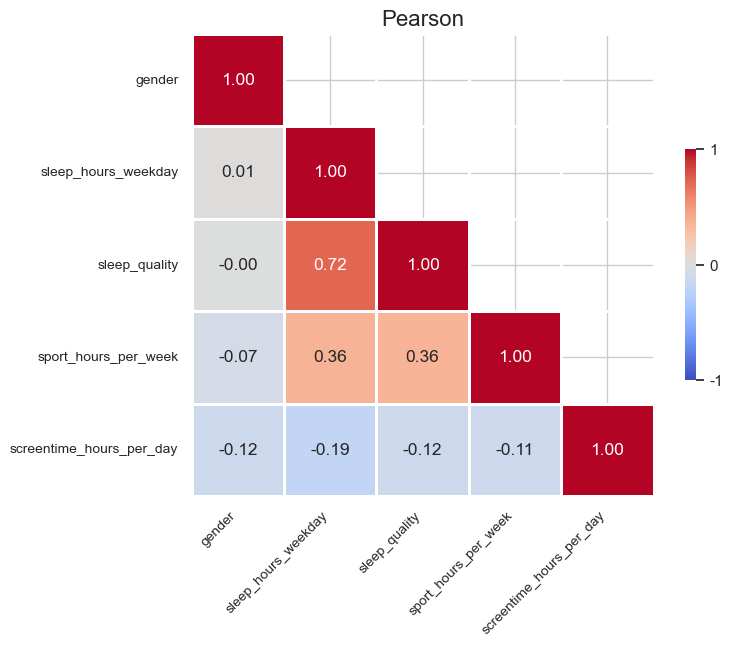

In [14]:
num_corr_heatmap(df.drop(columns='id').corr())

In [15]:
df.gender.value_counts(normalize=True)

gender
1    0.538462
0    0.442308
2    0.019231
Name: proportion, dtype: float64

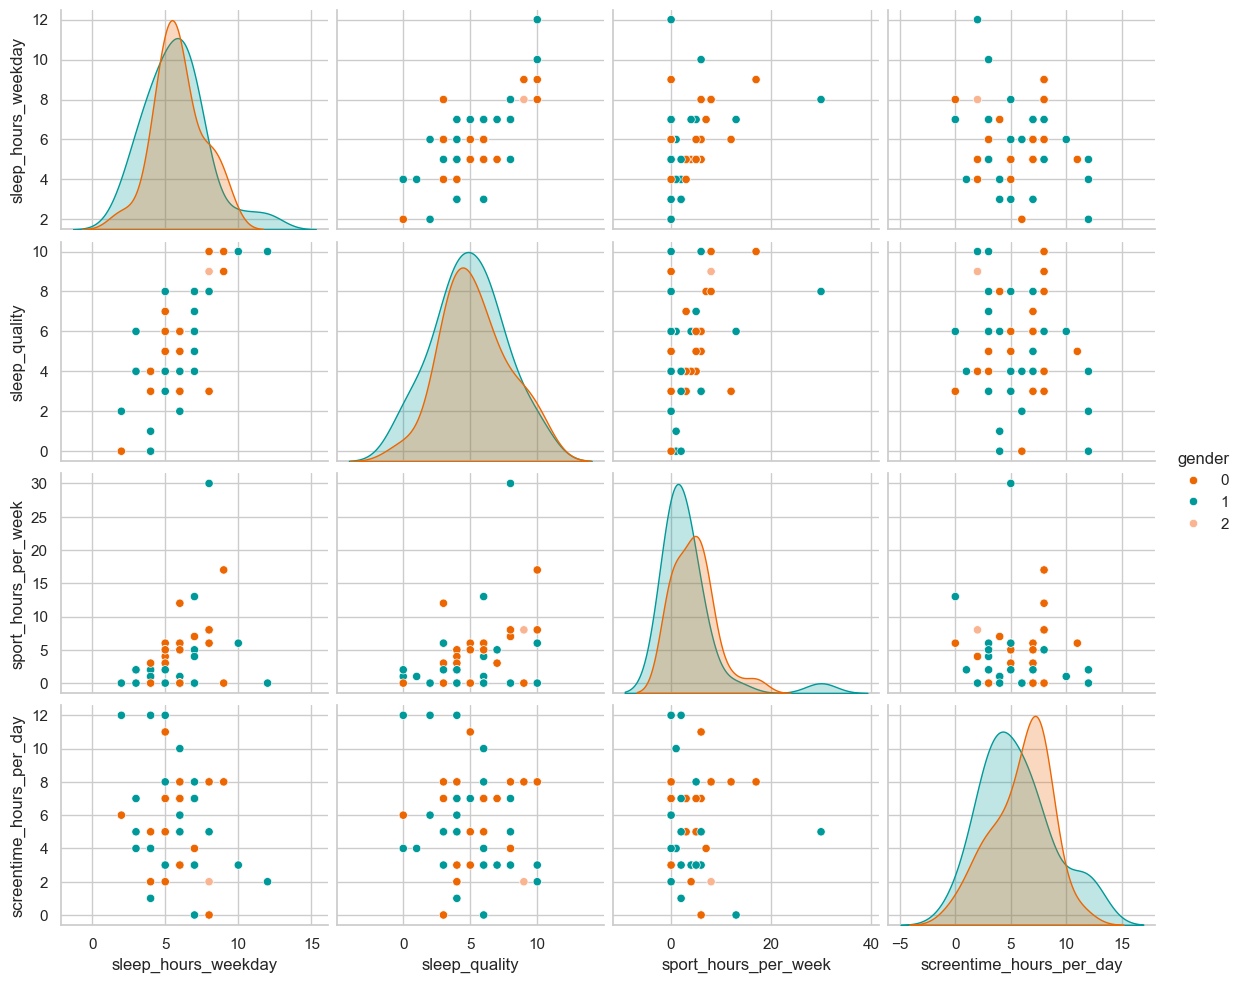

In [16]:
(sns
 .pairplot
    (df, 
     vars=[
        'sleep_hours_weekday',
        'sleep_quality',
        'sport_hours_per_week',
        'screentime_hours_per_day'
    ],
    hue='gender',
    height=2.5,
    aspect=1.2,
    palette=sns.color_palette([healthy_orange, siemens_petrol, healthy_orange_50])
    )
);

In [ ]:
X = df.loc[df.gender.isin([0, 1]), ['sport_hours_per_week', 'screentime_hours_per_day', 'gender']]
y = df.loc[df.gender.isin([0, 1]), 'sleep_quality']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          sleep_quality   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.218
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0984
Time:                        17:07:02   Log-Likelihood:                -116.18
No. Observations:                  51   AIC:                             240.4
Df Residuals:                      47   BIC:                             248.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [32]:
X = df.loc[df.gender.isin([0, 1]), ['sport_hours_per_week', 'screentime_hours_per_day']]
y = df.loc[df.gender.isin([0, 1]), 'sleep_quality']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          sleep_quality   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.307
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0451
Time:                        17:15:49   Log-Likelihood:                -116.26
No. Observations:                  51   AIC:                             238.5
Df Residuals:                      48   BIC:                             244.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

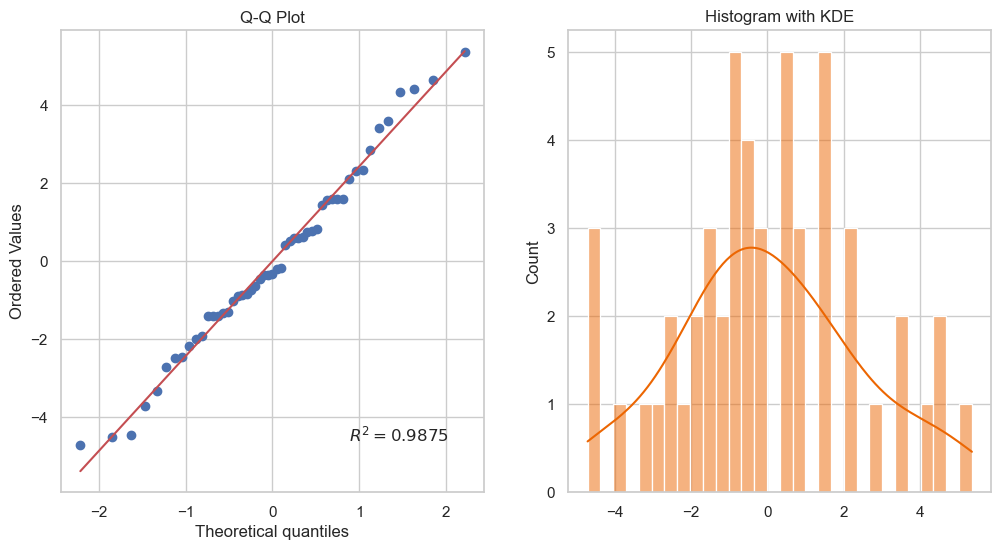

Shapiro-Wilk normality test: p-value = 0.666856912559511
D'Agostino's K^2 normality test: p-value = 0.8380130793925104
Kolmogorov-Smirnov normality test: p-value = 0.8795079479314921
Anderson-Darling normality test: statistic = 0.2515550918642333, critical value = 0.736


In [33]:
check_normality(model.resid)

In [22]:
df['sleep_score'] = df.sleep_hours_weekday * (df.sleep_quality / 10)

In [34]:
X = df.loc[:, ['sport_hours_per_week', 'screentime_hours_per_day']]
y = df.loc[:, 'sleep_score']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_score   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.055
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0235
Time:                        17:16:17   Log-Likelihood:                -119.08
No. Observations:                  52   AIC:                             244.2
Df Residuals:                      49   BIC:                             250.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df['pca_sleep'] = pca.fit_transform(df[['sleep_hours_weekday', 'sleep_quality']])

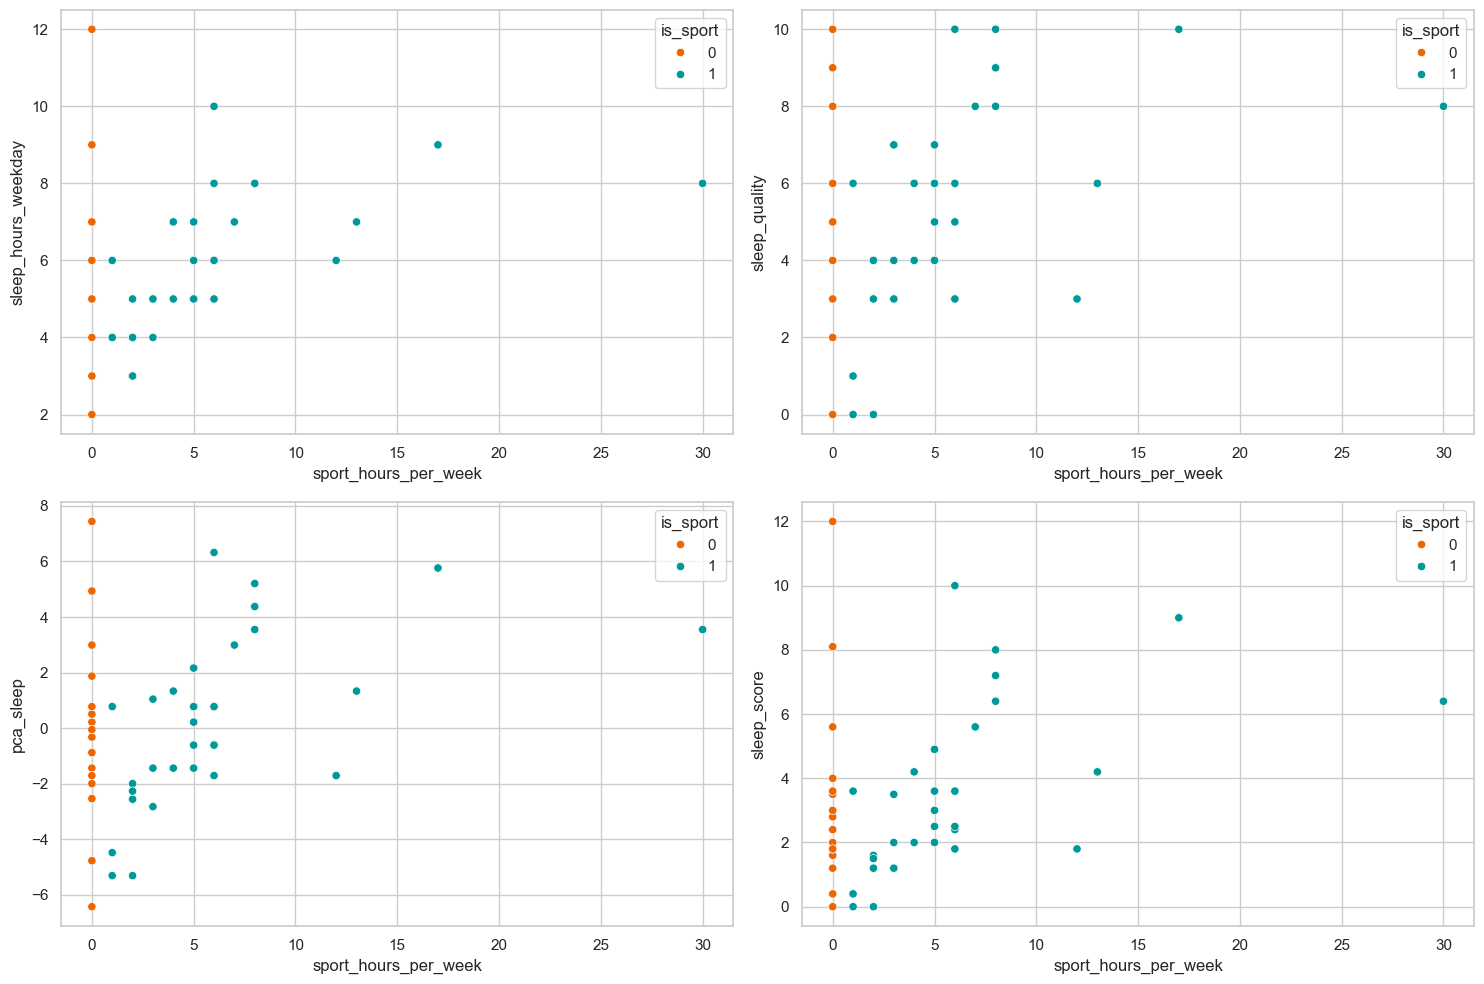

In [61]:
_, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x='sport_hours_per_week', y='sleep_hours_weekday', data=df, ax=axes[0, 0], hue='is_sport')
sns.scatterplot(x='sport_hours_per_week', y='sleep_quality', data=df, ax=axes[0, 1], hue='is_sport')
sns.scatterplot(x='sport_hours_per_week', y='pca_sleep', data=df, ax=axes[1, 0], hue='is_sport')
sns.scatterplot(x='sport_hours_per_week', y='sleep_score', data=df, ax=axes[1, 1], hue='is_sport')
plt.tight_layout()
plt.show()

In [36]:
X = df.loc[:, ['sport_hours_per_week', 'screentime_hours_per_day']]
y = df.loc[:, 'pca_sleep']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pca_sleep   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     4.605
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0147
Time:                        17:17:02   Log-Likelihood:                -126.21
No. Observations:                  52   AIC:                             258.4
Df Residuals:                      49   BIC:                             264.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [35]:
df['is_sport'] = (df.sport_hours_per_week > 0).astype(int)

In [64]:
X = df.loc[:, ['sport_hours_per_week', 'screentime_hours_per_day', 'is_sport']]
y = df.loc[:, 'pca_sleep']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pca_sleep   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     4.126
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0111
Time:                        17:27:58   Log-Likelihood:                -124.72
No. Observations:                  52   AIC:                             257.4
Df Residuals:                      48   BIC:                             265.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
X = df[['sport_hours_per_week', 'screentime_hours_per_day', 'is_sport', 'sport_hours_squared']]
y = df['pca_sleep']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pca_sleep   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     5.104
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00169
Time:                        17:52:17   Log-Likelihood:                -121.30
No. Observations:                  52   AIC:                             252.6
Df Residuals:                      47   BIC:                             262.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
X = df.loc[df.sport_hours_per_week != 30 ,['sport_hours_per_week', 'screentime_hours_per_day', 'is_sport']]
y = df.loc[df.sport_hours_per_week != 30, 'pca_sleep']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pca_sleep   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     5.377
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00289
Time:                        17:40:28   Log-Likelihood:                -120.43
No. Observations:                  51   AIC:                             248.9
Df Residuals:                      47   BIC:                             256.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   